# Importing Corpus / Packages

In [ ]:
!wget "https://archive.org/download/aravec2.0/wiki_cbow_300.zip"

--2024-06-04 18:47:54--  https://archive.org/download/aravec2.0/wiki_cbow_300.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia903107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip [following]
--2024-06-04 18:47:54--  https://ia903107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip
Resolving ia903107.us.archive.org (ia903107.us.archive.org)... 207.241.232.147
Connecting to ia903107.us.archive.org (ia903107.us.archive.org)|207.241.232.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364888893 (348M) [application/zip]
Saving to: ‘wiki_cbow_300.zip’

wiki_cbow_300.zip   100%[===================>] 347.98M   678KB/s    in 5m 0s   

2024-06-04 18:52:54 (1.16 MB/s) - ‘wiki_cbow_300.zip’ saved [364888893/364888893]



In [ ]:
!wget 'https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_wiki.zip'

--2024-06-04 18:53:01--  https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_wiki.zip
Resolving bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)... 108.61.0.122, 2001:19f0:0:22::100
Connecting to bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)|108.61.0.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1488871452 (1.4G) [application/zip]
Saving to: ‘full_grams_sg_300_wiki.zip’

full_grams_sg_300_w 100%[===================>]   1.39G  95.0MB/s    in 17s     

2024-06-04 18:53:19 (82.0 MB/s) - ‘full_grams_sg_300_wiki.zip’ saved [1488871452/1488871452]



In [ ]:
!unzip '/content/full_grams_sg_300_wiki.zip'

Archive:  /content/full_grams_sg_300_wiki.zip
  inflating: full_grams_sg_300_wiki.mdl  
  inflating: full_grams_sg_300_wiki.mdl.trainables.syn1neg.npy   bad CRC 025479a0  (should be 55675a21)
  inflating: full_grams_sg_300_wiki.mdl.wv.vectors.npy  


In [ ]:
!unzip "wiki_cbow_300.zip"

Archive:  wiki_cbow_300.zip
  inflating: wikipedia_cbow_300      
  inflating: wikipedia_cbow_300.trainables.syn1neg.npy  
  inflating: wikipedia_cbow_300.wv.vectors.npy  


In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk.data
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import SnowballStemmer
from nltk.stem import ISRIStemmer
stemmer = ISRIStemmer()
stemmer2 = SnowballStemmer('arabic')
stemmer3 = PorterStemmer()
stopwords = stopwords.words('arabic')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Preprocessing Techniques

In [ ]:
excel = pd.read_excel('/content/drive/MyDrive/News_train.xlsx')

df = pd.DataFrame(excel)

df.head()

,Type,News
0,politics,اشتباك الحريري-عون.. اتهامات لباسيل بالتمسك با...
1,politics,عون: الحريري أصبح غريب الأطوار
2,politics,وزير الخارجية الأمريكي: ندرس سحب كامل قواتنا م...
3,politics,أفغانستان.. استعدادات حثيثة لاجتماع تركيا وكاب...
4,politics,أندبندنت‮:‬ ‬مفاوضات ‬سرّية ‬‬كادت ‬تنقذ ‬القذافي


<Axes: xlabel='Type', ylabel='count'>

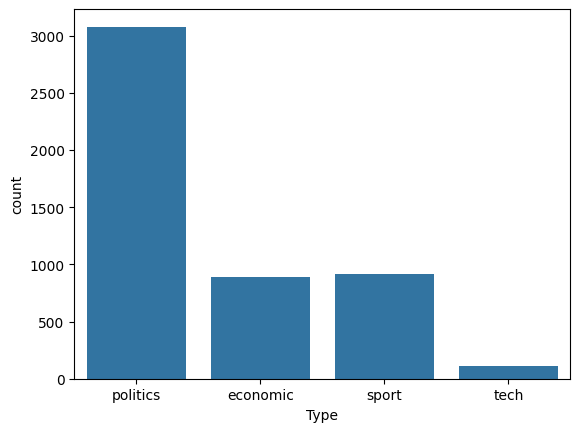

In [ ]:
sns.countplot(x='Type', data=df)

In [ ]:
def preprocess_text(text):

  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  text = text.strip()
  text = re.sub(r'\d+', '', text)
  text = re.sub('أ|إ|آ|ا', 'ا', text)
  text = re.sub('ال', '', text)
  text = re.sub('ة', 'ه', text)
  text = re.sub(r'[a-zA-Z]' , '', text)
  return text

df['News_processed'] = df['News'].apply(preprocess_text)

In [ ]:
(df['News_processed'][5])

'سيف قذافي اتفاق قريب جدا على ترحيل ممرضات وطبيب بلغاريين'

In [ ]:
def stem_and_tokenize_arabic(text):
  stemmed_text = [stemmer.stem(word) for word in word_tokenize(text)]
  processed_text = ' '.join(stemmed_text)
  return processed_text

df['News_processed'] = df['News_processed'].apply(stem_and_tokenize_arabic)


In [ ]:
def stem_and_tokenize_arabic(text):
  stemmed_text = [stemmer2.stem(word) for word in word_tokenize(text)]
  processed_text = ' '.join(stemmed_text)
  return processed_text

df['News_processed'] = df['News_processed'].apply(stem_and_tokenize_arabic)


In [ ]:
def stem_and_tokenize_arabic(text):
  stemmed_text = [stemmer3.stem(word) for word in word_tokenize(text)]
  processed_text = ' '.join(stemmed_text)
  return processed_text

df['News_processed'] = df['News_processed'].apply(stem_and_tokenize_arabic)


# TF-IDF and BOW implementation

In [ ]:
x = df.drop(['Type', 'News'], axis = 1)
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
from keras.utils import to_categorical
y = to_categorical(labels)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(max_features = 500)

x_train_tfidf = vectorizer.fit_transform(x_train['News_processed'])
x_val_tfidf = vectorizer.fit_transform(x_test['News_processed'])

train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

val_tfidf = pd.DataFrame(x_val_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

x_train_tfidf

<4000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 27050 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = cv_uni_vec = CountVectorizer(max_features=500,
                                 stop_words=None,
                                 ngram_range=(2,2)
                                 )
X_train_uni = cv_uni_vec.fit_transform(x_train['News_processed'])
X_test_uni = cv_uni_vec.fit_transform(x_test['News_processed'])

train_bow = pd.DataFrame(X_train_uni.toarray(), columns=vectorizer.get_feature_names_out())

val_bow = pd.DataFrame(X_test_uni.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
X_train_uni.toarray()

X_train_uni.shape

(4000, 500)

In [ ]:
x_train_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.35581571],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
x_train_tfidf.shape

(4000, 500)

# TF-IDF & BOW with LR and NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(train_tfidf.values, y2_train)

y_pred = naive_bayes_classifier.predict(val_tfidf.values)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       647
           1       0.16      0.16      0.16       163
           2       0.15      0.14      0.15       176
           3       0.12      0.07      0.09        14

    accuracy                           0.50      1000
   macro avg       0.28      0.27      0.27      1000
weighted avg       0.49      0.50      0.50      1000



In [ ]:
model = LogisticRegression(random_state=42)
model.fit(train_tfidf.values, y2_train)

y_pred = model.predict(val_tfidf.values)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       647
           1       0.16      0.10      0.13       163
           2       0.35      0.20      0.26       176
           3       0.00      0.00      0.00        14

    accuracy                           0.59      1000
   macro avg       0.30      0.29      0.28      1000
weighted avg       0.53      0.59      0.55      1000



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(train_bow.values, y2_train)

y_pred = naive_bayes_classifier.predict(val_bow.values)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.42      0.52       647
           1       0.14      0.18      0.16       163
           2       0.20      0.16      0.18       176
           3       0.05      0.86      0.09        14

    accuracy                           0.34      1000
   macro avg       0.27      0.40      0.24      1000
weighted avg       0.51      0.34      0.40      1000



In [ ]:
model = LogisticRegression(random_state=42)
model.fit(train_bow.values, y2_train)

y_pred = model.predict(val_bow.values)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       647
           1       0.19      0.12      0.15       163
           2       0.12      0.05      0.07       176
           3       0.00      0.00      0.00        14

    accuracy                           0.55      1000
   macro avg       0.24      0.24      0.23      1000
weighted avg       0.46      0.55      0.50      1000



# W2V CBOW with NB and LR

In [ ]:
!pip install gensim
import gensim
from gensim.models import Word2Vec
model = Word2Vec.load('/content/wikipedia_cbow_300')
embedding_dim = model.vector_size

In [ ]:
x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

NameError: name 'le' is not defined

In [ ]:
OOV_tokens = []
train_tokens = []
test_tokens = []
train_w2v_embeddings = []
test_w2v_embeddings = []

def get_doc_vec(sent, model, data):
  w2v_embeddings = []
  tokens = sent.split()
  for word in tokens:
    try:
      if data == 'train':
        w2v_embeddings.append(model.wv[word])
        train_tokens.append(word)
      else:
        w2v_embeddings.append(model.wv[word])
        test_tokens.append(word)
    except:
      OOV_tokens.append(word)
      continue
  if len(w2v_embeddings) == 0:
    return None
  return sum(w2v_embeddings)/len(w2v_embeddings)

In [ ]:
X_train_w2v_embeddings = x_train['News_processed'].apply(lambda sent: get_doc_vec(sent, model,'train'))
X_test_w2v_embeddings = x_test['News_processed'].apply(lambda sent: get_doc_vec(sent, model,'test'))

In [ ]:
X_train_w2v_c_embeddings_list = []
X_test_w2v_c_embeddings_list = []

for embedding in X_train_w2v_embeddings:
    if embedding is not None:
        X_train_w2v_c_embeddings_list.append(embedding)
    else:
        X_train_w2v_c_embeddings_list.append(np.zeros(embedding_dim))

for embedding in X_test_w2v_embeddings:
    if embedding is not None:
        X_test_w2v_c_embeddings_list.append(embedding)
    else:
        X_test_w2v_c_embeddings_list.append(np.zeros(embedding_dim))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_w2v_c_embeddings_list, y2_train)

y_pred = naive_bayes_classifier.predict(X_test_w2v_c_embeddings_list)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       647
           1       0.69      0.72      0.71       163
           2       0.67      0.57      0.62       176
           3       0.14      0.57      0.22        14

    accuracy                           0.76      1000
   macro avg       0.59      0.67      0.60      1000
weighted avg       0.79      0.76      0.77      1000



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(random_state=42)
model.fit(X_train_w2v_c_embeddings_list, y2_train)

y_pred = model.predict(X_test_w2v_c_embeddings_list)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       647
           1       0.82      0.82      0.82       163
           2       0.82      0.69      0.75       176
           3       0.38      0.36      0.37        14

    accuracy                           0.86      1000
   macro avg       0.73      0.70      0.71      1000
weighted avg       0.85      0.86      0.85      1000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# W2V SG with NB and LR

In [ ]:
model = Word2Vec.load('/content/full_grams_sg_300_wiki.mdl')
embedding_dim = model.vector_size

In [ ]:
OOV_tokens = []
train_tokens = []
test_tokens = []
train_w2v_embeddings = []
test_w2v_embeddings = []

def get_doc_vec(sent, model, data):
  w2v_embeddings = []
  tokens = sent.split()
  for word in tokens:
    try:
      if data == 'train':
        w2v_embeddings.append(model.wv[word])
        train_tokens.append(word)
      else:
        w2v_embeddings.append(model.wv[word])
        test_tokens.append(word)
    except:
      OOV_tokens.append(word)
      continue
  if len(w2v_embeddings) == 0:
    return None
  return sum(w2v_embeddings)/len(w2v_embeddings)

In [ ]:
X_train_w2v_embeddings = x_train['News_processed'].apply(lambda sent: get_doc_vec(sent, model,'train'))
X_test_w2v_embeddings = x_test['News_processed'].apply(lambda sent: get_doc_vec(sent, model,'test'))

In [ ]:
X_train_w2v_sg_embeddings_list = []
X_test_w2v_sg_embeddings_list = []

for embedding in X_train_w2v_embeddings:
    if embedding is not None:
        X_train_w2v_sg_embeddings_list.append(embedding)
    else:
        X_train_w2v_sg_embeddings_list.append(np.zeros(embedding_dim))

for embedding in X_test_w2v_embeddings:
    if embedding is not None:
        X_test_w2v_sg_embeddings_list.append(embedding)
    else:
        X_test_w2v_sg_embeddings_list.append(np.zeros(embedding_dim))

In [ ]:
X_train_w2v_embeddings_array = np.array(X_train_w2v_sg_embeddings_list)
X_test_w2v_embeddings_array = np.array(X_test_w2v_sg_embeddings_list)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_w2v_sg_embeddings_list, y2_train)

y_pred = naive_bayes_classifier.predict(X_test_w2v_sg_embeddings_list)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       647
           1       0.74      0.82      0.78       163
           2       0.75      0.66      0.70       176
           3       0.14      0.36      0.20        14

    accuracy                           0.81      1000
   macro avg       0.63      0.67      0.64      1000
weighted avg       0.82      0.81      0.81      1000



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(random_state=42)
model.fit(X_train_w2v_sg_embeddings_list, y2_train)

y_pred = model.predict(X_test_w2v_sg_embeddings_list)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       647
           1       0.89      0.87      0.88       163
           2       0.87      0.70      0.77       176
           3       1.00      0.07      0.13        14

    accuracy                           0.88      1000
   macro avg       0.91      0.65      0.68      1000
weighted avg       0.88      0.88      0.87      1000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Bert Embedding with LR and NB & Model

In [ ]:
!pip install transformers

from transformers import BertModel, BertTokenizer, AutoTokenizer, AutoModel
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model

In [ ]:
import torch
model_name = 'aubmindlab/bert-base-arabert'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

embeddings_list = []
max_length = 0
for word in df['News_processed']:
  tokens = tokenizer.tokenize(word)
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  max_length = max(max_length, len(token_ids))
  embeddings_list.append(token_ids)

padded_embeddings_list = []
for tokens in embeddings_list:
    padded_tokens = tokens + [tokenizer.pad_token_id] * (max_length - len(tokens))
    padded_embeddings_list.append(padded_tokens)

tensor_token_ids = torch.tensor(padded_embeddings_list)

with torch.no_grad():
    results = model(tensor_token_ids)

embeddings = results.last_hidden_state

mean_embeddings = torch.mean(embeddings, dim=1)
embeddings_list = mean_embeddings.numpy()

print(embeddings_list.shape)

(5000, 768)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
from keras.utils import to_categorical
y = to_categorical(labels)

y2 = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(embeddings_list, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(embeddings_list, y2, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X2_train = np.array(X2_train)
X2_test = np.array(X2_test)
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

model_name = 'aubmindlab/bert-base-arabert'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)

def tokenize(sentences, tokenizer, max_len):
    tokens = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt", max_length=max_len)
    return tokens['input_ids'], tokens['attention_mask']

train_sentences = x_train['News_processed'].tolist()
test_sentences = x_test['News_processed'].tolist()

max_sequence_len = max(len(x.split()) for x in train_sentences + test_sentences)  # maximum length of sequences
train_input_ids, train_attention_mask = tokenize(train_sentences, tokenizer, max_sequence_len)
test_input_ids, test_attention_mask = tokenize(test_sentences, tokenizer, max_sequence_len)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y2_train)
y_test_encoded = label_encoder.transform(y2_test)

train_dataset = TensorDataset(train_input_ids, train_attention_mask, torch.tensor(y_train_encoded))
test_dataset = TensorDataset(test_input_ids, test_attention_mask, torch.tensor(y_test_encoded))

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

epochs = 5
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    model.eval()
    correct_predictions = 0
    total_predictions = 0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            correct_predictions += (predictions == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    print(f'Epoch {epoch+1}/{epochs}, Accuracy: {accuracy:.2f}')

# Generate classification report
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
target_names = [str(name) for name in target_names]  # Convert target names to strings
print("Classification Report:")
print(classification_report(all_labels, all_predictions, target_names=target_names))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5, Accuracy: 0.84
Epoch 2/5, Accuracy: 0.89
Epoch 3/5, Accuracy: 0.88
Epoch 4/5, Accuracy: 0.90
Epoch 5/5, Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       647
           1       0.91      0.92      0.91       163
           2       0.86      0.72      0.78       176
           3       0.56      0.36      0.43        14

    accuracy                           0.90      1000
   macro avg       0.81      0.74      0.76      1000
weighted avg       0.89      0.90      0.89      1000



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y2_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Test Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.46      0.59       647
           1       0.52      0.61      0.56       163
           2       0.25      0.62      0.36       176
           3       0.10      0.14      0.11        14

    accuracy                           0.51      1000
   macro avg       0.43      0.46      0.41      1000
weighted avg       0.67      0.51      0.54      1000



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(random_state=42)
model.fit(X2_train, y2_train)

y_pred = model.predict(X2_test)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       647
           1       0.80      0.77      0.78       163
           2       0.73      0.65      0.69       176
           3       0.11      0.07      0.09        14

    accuracy                           0.82      1000
   macro avg       0.62      0.60      0.61      1000
weighted avg       0.81      0.82      0.81      1000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Bert embedding with GRU & LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)
y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)  # maximum length of sequences

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(5000, 768, weights = [embeddings_list], input_length=max_sequence_len, trainable=False))

model.add(GRU(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 3s 9ms/step - loss: 1.0387 - accuracy: 0.6047 - val_loss: 0.8923 - val_accuracy: 0.6640
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 0.8998 - accuracy: 0.6543 - val_loss: 0.8253 - val_accuracy: 0.7030
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.7740 - accuracy: 0.7090 - val_loss: 0.7445 - val_accuracy: 0.7260
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6858 - accuracy: 0.7395 - val_loss: 0.5984 - val_accuracy: 0.7870
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6141 - accuracy: 0.7655 - val_loss: 0.6074 - val_accuracy: 0.8010
Epoch 6/10
125/125 [==============================] - 1s 7ms/step - loss: 0.5162 - accuracy: 0.8152 - val_loss: 0.5256 - val_accuracy: 0.8150
Epoch 7/10
125/125 [==============================] - 1s 8ms/step - loss: 0.4798 - accuracy: 0.8292 - val_loss: 0.5354 - val_accuracy: 0.8100
Epoch 

In [ ]:
type(max_sequence_len)

int

In [ ]:
x_train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   23,   31,  660,    2,
         65,  336, 1093,    1,  167], dtype=int32)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
embeddings_array = np.array(embeddings_list)
bert_embeddings = embeddings_array.reshape((5000,768))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)  # maximum length of sequences

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(5000, 768, weights = [bert_embeddings], input_length=max_sequence_len, trainable=False))

model.add(LSTM(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 3s 9ms/step - loss: 1.0151 - accuracy: 0.6140 - val_loss: 0.9069 - val_accuracy: 0.6630
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.9562 - accuracy: 0.6323 - val_loss: 0.8859 - val_accuracy: 0.6630
Epoch 3/10
125/125 [==============================] - 1s 6ms/step - loss: 0.9357 - accuracy: 0.6390 - val_loss: 0.8778 - val_accuracy: 0.6640
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.8961 - accuracy: 0.6530 - val_loss: 0.8453 - val_accuracy: 0.6730
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.8545 - accuracy: 0.6700 - val_loss: 0.7955 - val_accuracy: 0.7030
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.7768 - accuracy: 0.6975 - val_loss: 0.7745 - val_accuracy: 0.6970
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 0.7139 - accuracy: 0.7243 - val_loss: 0.6770 - val_accuracy: 0.7250
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
embeddings_list

array([[-0.3014416 ,  1.0202115 ,  0.49604067, ..., -0.0678372 ,
         0.29666933,  0.11980575],
       [-0.3497997 ,  1.1660739 ,  0.59739494, ...,  0.7400403 ,
        -0.11763303,  0.24691655],
       [-0.08963694,  0.75863695,  0.3407913 , ...,  0.26959124,
         0.15297945,  0.433246  ],
       ...,
       [-0.27660304,  1.0125841 ,  0.35874498, ...,  0.34917942,
         0.24367024,  0.02161656],
       [-0.27867278,  1.1481411 ,  0.55462   , ...,  0.2817615 ,
         0.1840114 ,  0.644825  ],
       [-0.16831407,  1.0457609 ,  0.43612203, ...,  0.10131398,
         0.12891287,  0.3510527 ]], dtype=float32)

# TF-IDF & BOW with GRU & LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)  # maximum length of sequences

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(4000, 500, weights = [x_train_tfidf.toarray()], input_length=max_sequence_len, trainable=False))

model.add(GRU(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 4s 15ms/step - loss: 0.9383 - accuracy: 0.6290 - val_loss: 0.8363 - val_accuracy: 0.7310
Epoch 2/10
125/125 [==============================] - 1s 7ms/step - loss: 0.5707 - accuracy: 0.7925 - val_loss: 0.5020 - val_accuracy: 0.8260
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.4117 - accuracy: 0.8535 - val_loss: 0.4213 - val_accuracy: 0.8500
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3510 - accuracy: 0.8708 - val_loss: 0.4329 - val_accuracy: 0.8550
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2967 - accuracy: 0.8942 - val_loss: 0.4652 - val_accuracy: 0.8330
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2438 - accuracy: 0.9158 - val_loss: 0.4497 - val_accuracy: 0.8480
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2140 - accuracy: 0.9337 - val_loss: 0.4694 - val_accuracy: 0.8570
Epoch

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)  # maximum length of sequences

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(4000, 500, weights = [X_train_uni.toarray()], input_length=max_sequence_len, trainable=False))

model.add(GRU(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 3s 9ms/step - loss: 0.9146 - accuracy: 0.6447 - val_loss: 0.6618 - val_accuracy: 0.7470
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.5725 - accuracy: 0.7880 - val_loss: 0.4971 - val_accuracy: 0.8150
Epoch 3/10
125/125 [==============================] - 1s 8ms/step - loss: 0.4566 - accuracy: 0.8332 - val_loss: 0.4750 - val_accuracy: 0.8430
Epoch 4/10
125/125 [==============================] - 1s 7ms/step - loss: 0.3977 - accuracy: 0.8575 - val_loss: 0.4982 - val_accuracy: 0.8340
Epoch 5/10
125/125 [==============================] - 1s 8ms/step - loss: 0.3570 - accuracy: 0.8700 - val_loss: 0.4937 - val_accuracy: 0.8360
Epoch 6/10
125/125 [==============================] - 1s 9ms/step - loss: 0.3047 - accuracy: 0.8917 - val_loss: 0.5315 - val_accuracy: 0.8400
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 0.2649 - accuracy: 0.9068 - val_loss: 0.5214 - val_accuracy: 0.8330
Epoch 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)  # maximum length of sequences

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(4000, 500, weights = [X_train_uni.toarray()], input_length=max_sequence_len, trainable=False))

model.add(LSTM(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 3s 9ms/step - loss: 0.9664 - accuracy: 0.6225 - val_loss: 0.8041 - val_accuracy: 0.7210
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6343 - accuracy: 0.7665 - val_loss: 0.5422 - val_accuracy: 0.8100
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.4928 - accuracy: 0.8220 - val_loss: 0.5254 - val_accuracy: 0.8170
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.4350 - accuracy: 0.8410 - val_loss: 0.4940 - val_accuracy: 0.8300
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3764 - accuracy: 0.8652 - val_loss: 0.4753 - val_accuracy: 0.8420
Epoch 6/10
125/125 [==============================] - 1s 6ms/step - loss: 0.3413 - accuracy: 0.8750 - val_loss: 0.4924 - val_accuracy: 0.8240
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 0.3063 - accuracy: 0.8857 - val_loss: 0.5014 - val_accuracy: 0.8340
Epoch 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)  # maximum length of sequences

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(4000, 500, weights = [x_train_tfidf.toarray()], input_length=max_sequence_len, trainable=False))

model.add(LSTM(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 3s 9ms/step - loss: 0.9379 - accuracy: 0.6273 - val_loss: 0.7473 - val_accuracy: 0.7480
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.5976 - accuracy: 0.7912 - val_loss: 0.5076 - val_accuracy: 0.8210
Epoch 3/10
125/125 [==============================] - 1s 6ms/step - loss: 0.4525 - accuracy: 0.8382 - val_loss: 0.4662 - val_accuracy: 0.8320
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3859 - accuracy: 0.8627 - val_loss: 0.4507 - val_accuracy: 0.8490
Epoch 5/10
125/125 [==============================] - 1s 6ms/step - loss: 0.3498 - accuracy: 0.8740 - val_loss: 0.4474 - val_accuracy: 0.8430
Epoch 6/10
125/125 [==============================] - 1s 6ms/step - loss: 0.2943 - accuracy: 0.8925 - val_loss: 0.4605 - val_accuracy: 0.8440
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2773 - accuracy: 0.9022 - val_loss: 0.4414 - val_accuracy: 0.8520
Epoch 

# W2V CBOW with GRU & LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
X_train_w2v_c_embeddings_array = np.array(X_train_w2v_c_embeddings_list)
word2vec_embeddings = X_train_w2v_c_embeddings_array.reshape((4000,300))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(4000, 300, weights = [word2vec_embeddings], input_length=max_sequence_len, trainable=False))

model.add(LSTM(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 3s 9ms/step - loss: 0.9311 - accuracy: 0.6398 - val_loss: 0.7486 - val_accuracy: 0.7130
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 0.6521 - accuracy: 0.7588 - val_loss: 0.5360 - val_accuracy: 0.8000
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.4766 - accuracy: 0.8235 - val_loss: 0.4638 - val_accuracy: 0.8410
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3750 - accuracy: 0.8662 - val_loss: 0.4569 - val_accuracy: 0.8460
Epoch 5/10
125/125 [==============================] - 1s 6ms/step - loss: 0.3001 - accuracy: 0.8895 - val_loss: 0.5192 - val_accuracy: 0.8190
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2487 - accuracy: 0.9087 - val_loss: 0.4380 - val_accuracy: 0.8640
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.1636 - accuracy: 0.9460 - val_loss: 0.4493 - val_accuracy: 0.8580
Epoch 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
X_train_w2v_c_embeddings_array = np.array(X_train_w2v_c_embeddings_list)
word2vec_embeddings = X_train_w2v_c_embeddings_array.reshape((4000,300))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(4000, 300, weights = [word2vec_embeddings], input_length=max_sequence_len, trainable=False))

model.add(GRU(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 3s 9ms/step - loss: 0.9349 - accuracy: 0.6292 - val_loss: 0.7297 - val_accuracy: 0.7410
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6255 - accuracy: 0.7670 - val_loss: 0.5074 - val_accuracy: 0.8300
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.4432 - accuracy: 0.8380 - val_loss: 0.5201 - val_accuracy: 0.8110
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.3296 - accuracy: 0.8835 - val_loss: 0.4119 - val_accuracy: 0.8580
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2318 - accuracy: 0.9165 - val_loss: 0.4068 - val_accuracy: 0.8630
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.1623 - accuracy: 0.9450 - val_loss: 0.4863 - val_accuracy: 0.8590
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.1082 - accuracy: 0.9653 - val_loss: 0.4428 - val_accuracy: 0.8760
Epoch 

# W2V SG with GRU & LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
X_train_w2v_sg_embeddings_array = np.array(X_train_w2v_sg_embeddings_list)
word2vec_embeddings = X_train_w2v_sg_embeddings_array.reshape((4000,300))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(4000, 300, weights = [word2vec_embeddings], input_length=max_sequence_len, trainable=False))

model.add(GRU(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)

classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 4s 9ms/step - loss: 0.9893 - accuracy: 0.6130 - val_loss: 0.8655 - val_accuracy: 0.6580
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 0.8682 - accuracy: 0.6587 - val_loss: 0.7663 - val_accuracy: 0.6960
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 0.7049 - accuracy: 0.7362 - val_loss: 0.5980 - val_accuracy: 0.7820
Epoch 4/10
125/125 [==============================] - 1s 6ms/step - loss: 0.5785 - accuracy: 0.7908 - val_loss: 0.5627 - val_accuracy: 0.7980
Epoch 5/10
125/125 [==============================] - 1s 6ms/step - loss: 0.5052 - accuracy: 0.8163 - val_loss: 0.5047 - val_accuracy: 0.8210
Epoch 6/10
125/125 [==============================] - 1s 6ms/step - loss: 0.4415 - accuracy: 0.8465 - val_loss: 0.4974 - val_accuracy: 0.8210
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.4069 - accuracy: 0.8505 - val_loss: 0.5315 - val_accuracy: 0.8150
Epoch 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

x = pd.DataFrame(df['News_processed'])
labels =  df['Type'].replace({'politics': 0, 'sport':1, 'economic':2, 'tech':3})
y = to_categorical(labels)

y2 = le.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)
X_train_w2v_sg_embeddings_array = np.array(X_train_w2v_sg_embeddings_list)
word2vec_embeddings = X_train_w2v_sg_embeddings_array.reshape((4000,300))

tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(x_train['News_processed'])

train_sequences = tokenizer.texts_to_sequences(x_train['News_processed'])
test_sequences = tokenizer.texts_to_sequences(x_test['News_processed'])

max_sequence_len = max(len(x) for x in train_sequences + test_sequences)

x_train_padded = pad_sequences(train_sequences, maxlen=max_sequence_len, padding='pre')
x_val_padded = pad_sequences(test_sequences, maxlen=max_sequence_len, padding='pre')

model = Sequential()

model.add(Embedding(4000, 300, weights = [word2vec_embeddings], input_length=max_sequence_len, trainable=False))

model.add(LSTM(150))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_padded, y_train, epochs=10, verbose=1, validation_data=(x_val_padded, y_test))

y_pred = model.predict(x_val_padded)
y_test = np.argmax(y_test, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)

classification_report = classification_report(y_test, y_pred)
print(classification_report)

Epoch 1/10
125/125 [==============================] - 3s 9ms/step - loss: 1.0062 - accuracy: 0.6035 - val_loss: 0.9246 - val_accuracy: 0.6470
Epoch 2/10
125/125 [==============================] - 1s 6ms/step - loss: 0.8747 - accuracy: 0.6507 - val_loss: 0.8252 - val_accuracy: 0.6780
Epoch 3/10
125/125 [==============================] - 1s 6ms/step - loss: 0.7943 - accuracy: 0.7140 - val_loss: 0.7051 - val_accuracy: 0.7380
Epoch 4/10
125/125 [==============================] - 1s 6ms/step - loss: 0.6763 - accuracy: 0.7542 - val_loss: 0.6506 - val_accuracy: 0.7850
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6141 - accuracy: 0.7775 - val_loss: 0.5879 - val_accuracy: 0.7990
Epoch 6/10
125/125 [==============================] - 1s 6ms/step - loss: 0.5739 - accuracy: 0.7933 - val_loss: 0.5862 - val_accuracy: 0.7840
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.5553 - accuracy: 0.7975 - val_loss: 0.6368 - val_accuracy: 0.7540
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
